<a href="https://colab.research.google.com/github/andrey0000981/labpython/blob/main/%D0%BF%D0%BE%D0%B3%D0%BE%D0%BD%D1%8F_%D0%BA%D0%BE%D0%B1%D1%80%D0%B8%D0%BD_%D1%82%D1%84_05_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-e1b9bd62d4ef>:63: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  Hare_point.set_data(Xhare[i], Yhare[i])
<ipython-input-3-e1b9bd62d4ef>:64: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  Dog_point.set_data(Xdog[i], Ydog[i])


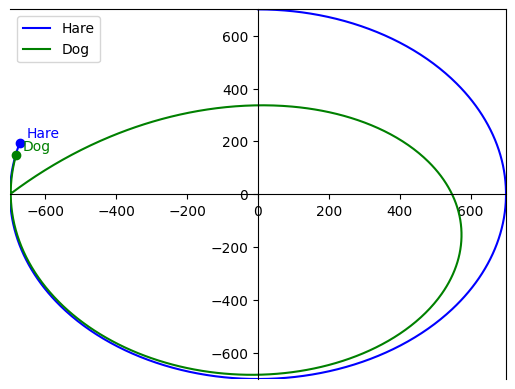

In [3]:
# Импортируем пакеты
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import scipy. integrate as integrate



#Ввод данных
R = 700
Vhare = 5
Vdog = 5.35
dt = 1
da = (Vhare*dt) / R

n = 700 # Кол-во кадров

Xhare = np.zeros(n)
Yhare = np.zeros(n)
Xdog = np.zeros(n)
Ydog = np.zeros(n)
f = np.zeros(n)

Xdog[0] = -R
Ydog[0] = 0

#Цикл движения зайца
for i in range(n):
  Xhare[i] = R * np.sin(da*i)
  Yhare[i] = R * np.cos(da*i)
  f[i] = np.arctan2((Yhare[i] - Ydog[i]), (Xhare[i] - Xdog[i]))

fig, ax = plt.subplots()
ax.set_xlim(-R, R)
ax.set_ylim(-R, R)

#Параметры графика
Hare_line, = ax.plot([], [], 'b-', label='Hare')
Dog_line, = ax.plot([], [], 'g-', label='Dog')
Hare_point, = ax.plot([], [], 'bo')
Dog_point, = ax.plot([], [], 'go')
dog_label=ax.text(0, 0, '', color='green')
hare_label=ax.text(0, 0, '', color='blue')
#Редактируем оси графика
ax=plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

#Обозначаем начальные элементы
def init():
  Hare_line.set_data([], [])
  Dog_line.set_data([], [])
  Hare_point.set_data([], [])
  Dog_point.set_data([], [])
  return Hare_line, Dog_line, Hare_point, Dog_point

#Вызываем функцию анимации
def animate(i):
  Hare_line.set_data(Xhare[:i+1], Yhare[:i+1])
  Dog_line.set_data(Xdog[:i+1], Ydog[:i+1])
  Hare_point.set_data(Xhare[i], Yhare[i])
  Dog_point.set_data(Xdog[i], Ydog[i])
#Указываем текст
  dog_label.set_text('Dog')
  hare_label.set_text('Hare')
#Располагаем текст над точкой
  dog_label.set_position((Xdog[i]+20, Ydog[i]+20))
  hare_label.set_position((Xhare[i]+20, Yhare[i]+20))

  return Hare_line, Dog_line, Hare_point, Dog_point

def update(frame):
  global Xdog, Ydog, f
  if frame < n-1:
    Xdog[frame+1] = Xdog[frame] + Vdog * dt * np.cos(f[frame])
    Ydog[frame+1] = Ydog[frame] + Vdog * dt * np.sin(f[frame])
    f[frame+1] = np.arctan2((Yhare[frame] - Ydog[frame]), (Xhare[frame] - Xdog[frame]))

  return animate(frame)

ax.legend()

ani = animation.FuncAnimation(fig, update, frames=n, interval=100, blit=True, init_func=init)
ani.save('run.mp4',fps=30, extra_args=['-vcodec','libx264'])
plt.show()
